**Lab 5 - Data Profiling and Cleaning with PySpark**

Authors: Shantanu Phadke & Igor Alfimov

# Setup

In [1]:
#Install pyspark
!python3 -m pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=5fc72afe5e86145c4ee1c2f3a501aeec6b9774563ee23299cd0ed8d3a68f49c4
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


### Import key functionality

In [2]:
#Import key functions from pyspark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
import matplotlib.pyplot as plt
import pyspark.sql.functions as F

In [3]:
#Create Spark session locally
spark=SparkSession.builder.appName('pyspark_class5_lab').getOrCreate()

In [4]:
spark

# Data Profiling

**Data Cleaning Process Flow:**

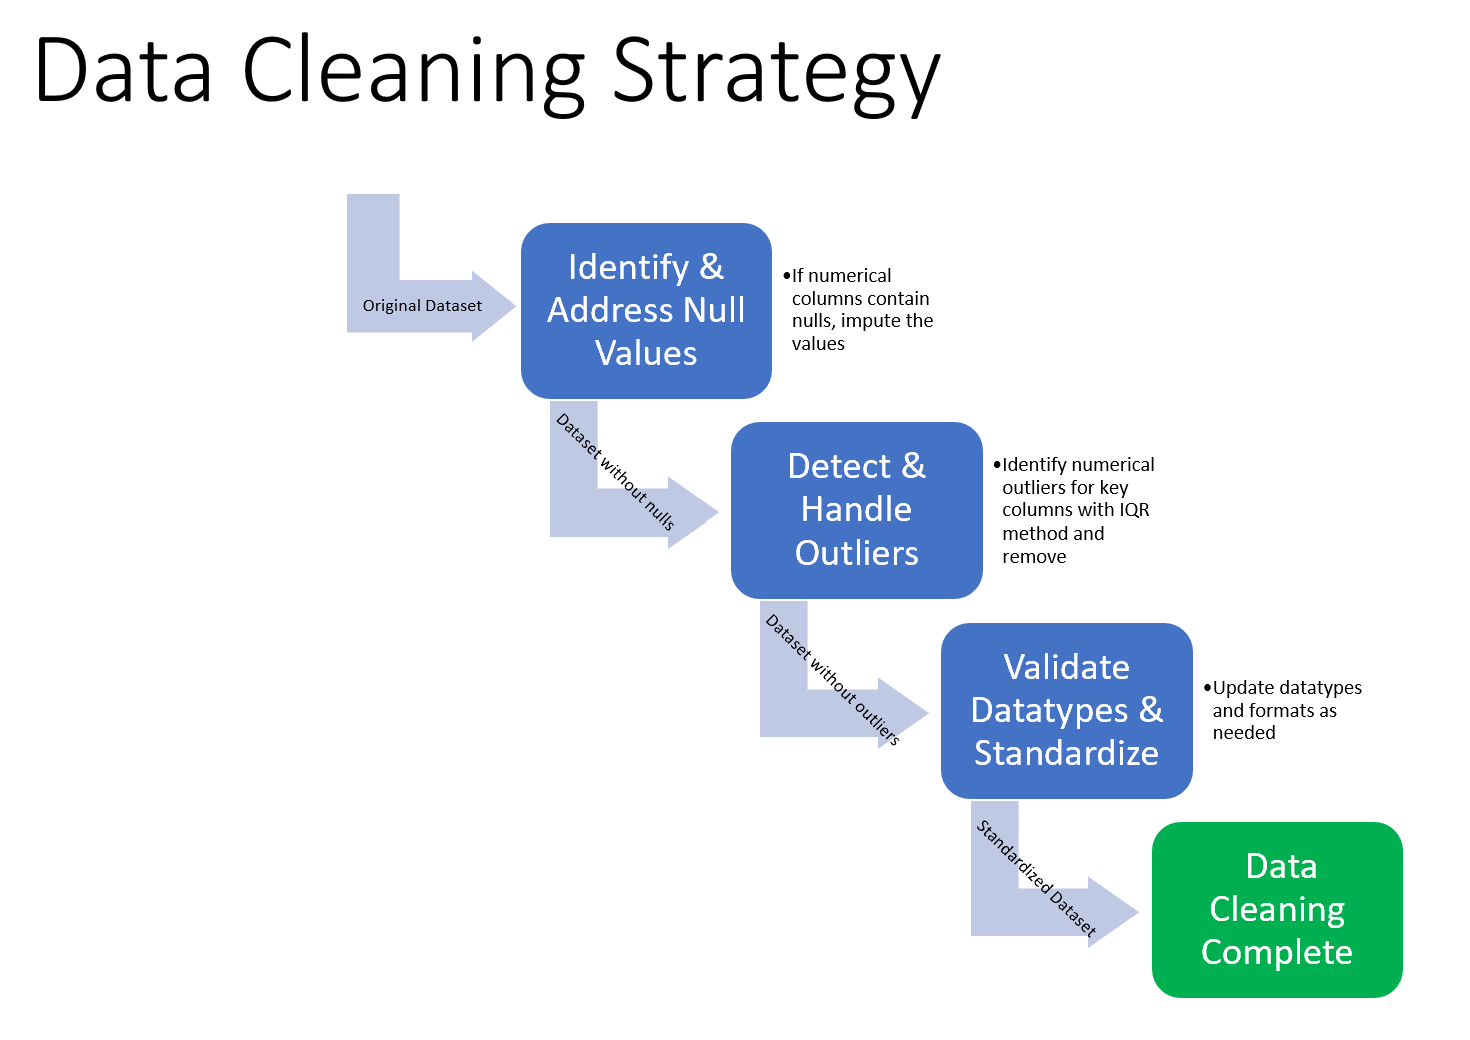

In [5]:
#Load Data
df = spark.read.option('header', 'true').csv('house_prices_train_data.csv', inferSchema=True)

### Examining the first few rows of data

In [6]:
#View data
df.show(3)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

### Getting the number of rows / number of columns in the dataframe

In [7]:
#Get number of rows in the dataset
number_rows = df.count()

#Get the number of columns in the dataset
number_columns = len(df.columns)

print('number of rows in the df = ' + str(number_rows) + ', number of columns in the df = ' + str(number_columns))

number of rows in the df = 1460, number of columns in the df = 81


### Getting the data types of the columns in the dataframe

In [8]:
#Get datatype of each column
df.dtypes

[('Id', 'int'),
 ('MSSubClass', 'int'),
 ('MSZoning', 'string'),
 ('LotFrontage', 'string'),
 ('LotArea', 'int'),
 ('Street', 'string'),
 ('Alley', 'string'),
 ('LotShape', 'string'),
 ('LandContour', 'string'),
 ('Utilities', 'string'),
 ('LotConfig', 'string'),
 ('LandSlope', 'string'),
 ('Neighborhood', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('BldgType', 'string'),
 ('HouseStyle', 'string'),
 ('OverallQual', 'int'),
 ('OverallCond', 'int'),
 ('YearBuilt', 'int'),
 ('YearRemodAdd', 'int'),
 ('RoofStyle', 'string'),
 ('RoofMatl', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('MasVnrType', 'string'),
 ('MasVnrArea', 'string'),
 ('ExterQual', 'string'),
 ('ExterCond', 'string'),
 ('Foundation', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinSF1', 'int'),
 ('BsmtFinType2', 'string'),
 ('BsmtFinSF2', 'int'),
 ('BsmtUnfSF', 'int'),
 ('TotalBsmtSF', 'int'),
 ('

In [9]:
#Define a function that fetches columns of specific datatype from the dataframe provided
def getColumnsOfType(df, type_str):
    dtypes_info = df.dtypes
    columns = []
    for column, column_type in dtypes_info:
        if column_type == type_str:
            columns.append(column)
    return columns

#Fetch all columns with integer datatype
numerical_columns = getColumnsOfType(df, 'int')

#Fetch all colums with string datatype
string_columns = getColumnsOfType(df, 'string')

### For numerical columns we find the summaries, including the minimum & maximum values in the column, the count of rows in the column, & the average value of the column.

In [10]:
#Get statistics for numerical columns
df[numerical_columns].describe().show()

+-------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-------------------+--------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+
|summary|               Id|        MSSubClass|           LotArea|       OverallQual|       OverallCond|         YearBuilt|      YearRemodAdd|       BsmtFinSF1|       BsmtFinSF2|        BsmtUnfSF|       TotalBsmtSF|         1stFlrSF|          2ndFlrSF|     LowQualFinSF|        GrLivArea|       BsmtFullBath|        BsmtHalfBath|  

### We want to see the distinct values in each of the categorical columns.

In [11]:
#See categories for all string columns
def showDistinctCategoricalValues(df, string_columns):
    for string_column in string_columns:
        distinct_categorical_values = df.select(string_column).distinct()
        distinct_categorical_values.show()

In [12]:
showDistinctCategoricalValues(df, string_columns)

+--------+
|MSZoning|
+--------+
| C (all)|
|      RH|
|      FV|
|      RL|
|      RM|
+--------+

+-----------+
|LotFrontage|
+-----------+
|         51|
|        124|
|         54|
|        101|
|        138|
|         69|
|        112|
|         42|
|         73|
|         87|
|         64|
|         30|
|         34|
|         59|
|        160|
|         85|
|         52|
|         35|
|         NA|
|         71|
+-----------+
only showing top 20 rows

+------+
|Street|
+------+
|  Pave|
|  Grvl|
+------+

+-----+
|Alley|
+-----+
|   NA|
| Pave|
| Grvl|
+-----+

+--------+
|LotShape|
+--------+
|     IR1|
|     IR2|
|     Reg|
|     IR3|
+--------+

+-----------+
|LandContour|
+-----------+
|        Bnk|
|        Low|
|        Lvl|
|        HLS|
+-----------+

+---------+
|Utilities|
+---------+
|   NoSeWa|
|   AllPub|
+---------+

+---------+
|LotConfig|
+---------+
|   Inside|
|      FR3|
|   Corner|
|  CulDSac|
|      FR2|
+---------+

+---------+
|LandSlope|
+---------+
|     

# Data Cleaning

### (b) Null Processing

In [13]:
#Define a function that takes in a dataframe and returns any colums with null values
def getColumnsWithNullValues(df):
    columns_with_null_values = []
    for column_name in df.columns:
        column_null_count = df.filter(col(column_name).isNull()).count()
        if column_null_count > 0:
            columns_with_null_values.append(column_name)
    return columns_with_null_values

#Get list of columns that have null values
columns_with_null_values = getColumnsWithNullValues(df)
print("List of df columns having null values = " + str(columns_with_null_values))

List of df columns having null values = []


In [16]:
from pyspark.sql.functions import isnan, when, count, col

# Additionally, Check for any NA values
missing_values = {}
for col_name in df.columns:
  values_missing = df.filter(col(col_name).isin(['NA'])).count()
  if(values_missing > 0):
    missing_values[col_name] = values_missing

for col_name, values in missing_values.items():
  print(f"{col_name}: {values}")


LotFrontage: 259
Alley: 1369
MasVnrType: 8
MasVnrArea: 8
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinType2: 38
Electrical: 1
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageQual: 81
GarageCond: 81
PoolQC: 1453
Fence: 1179
MiscFeature: 1406


**Missing Values Analysis Summary:**

Ultimately, we found no numerical columns with null values, so there was no need to impute the null values or deal with them in any way.

We have acknowledged presence of "NA" values in the categorical columns but due to the nature of attributes stored in the those columns, the "NA" values were deemed as a valid input for following columns: Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

We will replace NA values with 0 in the LotFrontage numerical column to represent houses that have no LotFrontage.

In [22]:
#Replace NA values in LotFrontage column with 0
df = df_copy.replace('NA', '0', 'LotFrontage')

#Check replacement was successful
distinct_names = df_copy.select("LotFrontage").distinct()
distinct_names.show()


+-----------+
|LotFrontage|
+-----------+
|         51|
|        124|
|         54|
|        101|
|        138|
|         69|
|        112|
|         42|
|         73|
|         87|
|         64|
|         30|
|         34|
|         59|
|        160|
|         85|
|         52|
|         35|
|          0|
|         71|
+-----------+


### (c) Detecting / Handling outliers

In [ ]:
# Define a function that takes in dataframe and columns of the dataframe and plots out the histogram distributions of the numerical columns
def plotHistograms(df, columns):
    for column in columns:
        plt.hist([x[column] for x in df.select(column).collect()], bins=50, color='blue', edgecolor='black')
        plt.title('Histogram of ' + column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

#Assess which numerical columns wmay contain outliers
plotHistograms(df, numerical_columns)

**Histogram Inspection:** Based on the visual inspection, we have assessed that following attributes may contain outliers: "LotArea", "OverallQual", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "TotRmsAbvGrd", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "SalePrice"

**Next Step:** We will use IQR method to determine values that are either less than the mean on the column - 1.5 * IQR OR greater than the mean of the column + 1.5 * IQR.

In [24]:
#Define function thaat removes outliers from specified columns based on the IQR rule and returns new dataframe without the removed records
def takeOutIQROutliers(df, columns):
    columnIQROutliers = []
    columns_filtered = []
    df_copy = df
    for column in columns:
        qtr_map = df_copy.select(
            F.expr("percentile_approx(" + column + ", 0.25) as Q1"), F.expr("percentile_approx(" + column + ", 0.75) as Q3")
        ).collect()[0].asDict()
        IQR = qtr_map["Q3"] - qtr_map["Q1"]

#Check how many rows we are about to review
        potential_quantity_filtered = df_copy.filter((F.col(column) < qtr_map["Q1"] - 1.5 * IQR) | (F.col(column) > qtr_map["Q3"] + 1.5 * IQR)).rdd.count()

#If we are about to remove more than 10 rows per column dont remove anything
        if potential_quantity_filtered <= 10:
            df_copy = df_copy.filter((F.col(column) >= qtr_map["Q1"] - 1.5 * IQR) & (F.col(column) <= qtr_map["Q3"] + 1.5 * IQR))
            columns_filtered.append(column)
    print("Ended up filtering the following columns = " + str(columns_filtered))
    return df_copy

#Create a new dataframe without outliers
df_no_outliers = takeOutIQROutliers(df, ["LotArea", "OverallQual", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "TotRmsAbvGrd", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "SalePrice"])


Ended up filtering the following columns = ['OverallQual', 'BsmtFinSF1', '2ndFlrSF']


In [25]:
#Check numner of rows of the new data frame
number_rows = df_no_outliers.count()
print(number_rows)

1450


In [ ]:
#Inspect that outliers were removed
plotHistograms(df_no_outliers, numerical_columns)

**Handling Outliers Summary:** Using visualization of numerical columns, we have identified columns where outliers could have been present.

We have checked if the amount of outliers identified is more than 10. If yes, we have not removed outliers as this finding implies that data is not normally distributed and skewed. Due to nature of our data set, this is expected

After necessary outliers were removed, new dataframe was created and count of new rows was checked to ensure we did not lose significant portion of our data.

### (d) Datatype Conversions / Standardization

In [ ]:
#Inspect column datatypes
df_no_outliers.dtypes

In [ ]:
#Inspect sample records
df_no_outliers.show(5)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

**Standardization Summary:** Based on the datatypes review and review of sample records, we have not identified any issue with current data type and format. To distinguish SalePrice column entry as financial entry, we will reformat this column to more digestable number.

In [36]:
#Convert SalePrice to financial format
from pyspark.sql.functions import col, format_number
df_final = df.withColumn("Formatted_SalePrice", format_number(col('SalePrice'), 2))

#Drop the original sale price column as it is not needed
df_final = df_final.drop('SalePrice')

#Verify reformatting is complete
df_final.show(5)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+-------------------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1

In [35]:
#Generate cleaned .csv file
df_final.write.csv('final.csv')